# Grid Search

Grid search across the rib parameter values.

## Constituent Functions

Term | Roi | FunctionType | DoseLevel | PercentVolume | Weight
-|-|-|-|-|-
0 | PTV | MinDose | 4800 | 0 | 1
1 | PTV | MaxDose | 6240 | 0 | 1
2 | SpinalCanal | MaxDose | 2080 | 0 | 1
3 | Lungs | MaxDvh | 2000 | 10 | 1
4 | Heart | MaxDvh | 2800 | 2 | 1
5 | Chestwall_L | MaxDvh | 3000 | 2 | 1
6 | Rib | MaxDose | [800, 3200] | 0 | 1

## Clinical Goals

Roi | Type | GoalCriteria | AcceptanceLevel | ParameterValue
-|-|-|-|-
PTV | MinDvh | AtLeast | 4800 | 95
PTV | MaxDose | AtMost | 6240 | 0
SpinalCanal | MaxDose | AtMost | 2080 | 0
Lungs | MaxDvh | AtMost | 2000 | 10
Heart | MaxDvh | AtMost | 2800 | 2
Chestwall_L | MaxDvh | AtMost | 3000 | 2
Rib | MaxDose | AtMost | 3200 | 0

In [1]:
from importlib import reload
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../src')
import plots

In [3]:
# Load results
funcs = pd.read_csv('funcs_grid.csv')
goals = pd.read_csv('goals.csv')
pars = pd.read_pickle('pars_grid.npy')
results = pd.read_pickle('results_grid.npy')

In [13]:
# Grab the first 25 samples since I accidently sampled more
pars = pars[pars['Sample'] < 25]
results = results[results['Sample'] < 25]

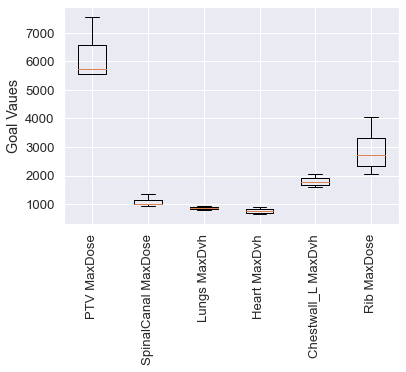

In [17]:
# Clinical goal results
plots.boxplot(goals[1:], results, 'goals')

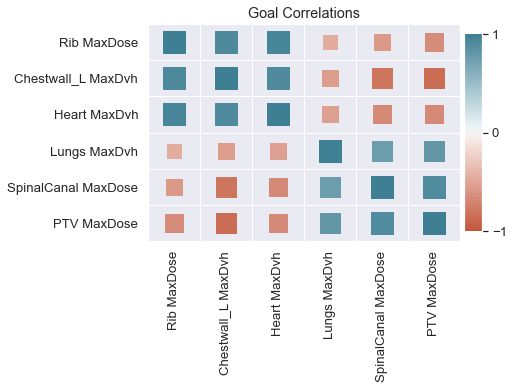

In [18]:
# Goal correlations
plots.corrplot(goals[1:], results, title='Goal Correlations')

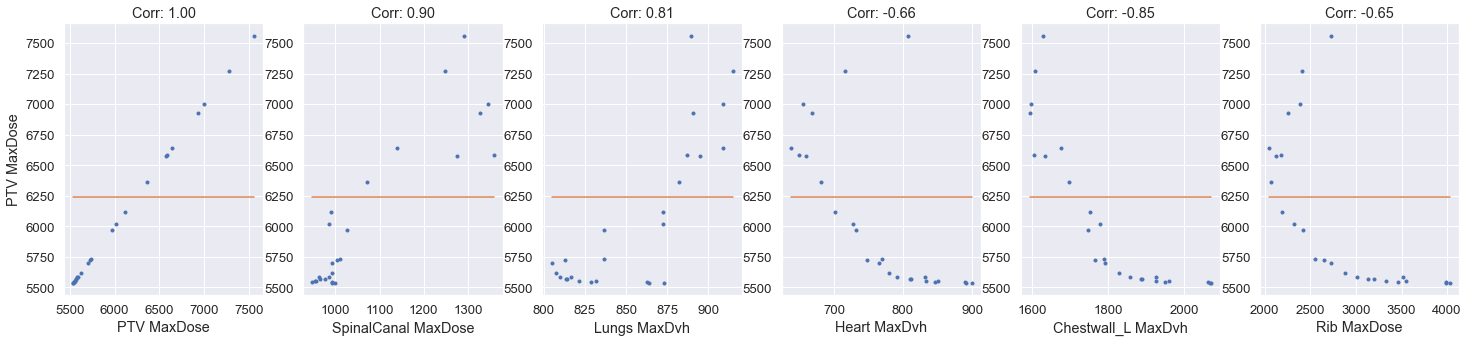

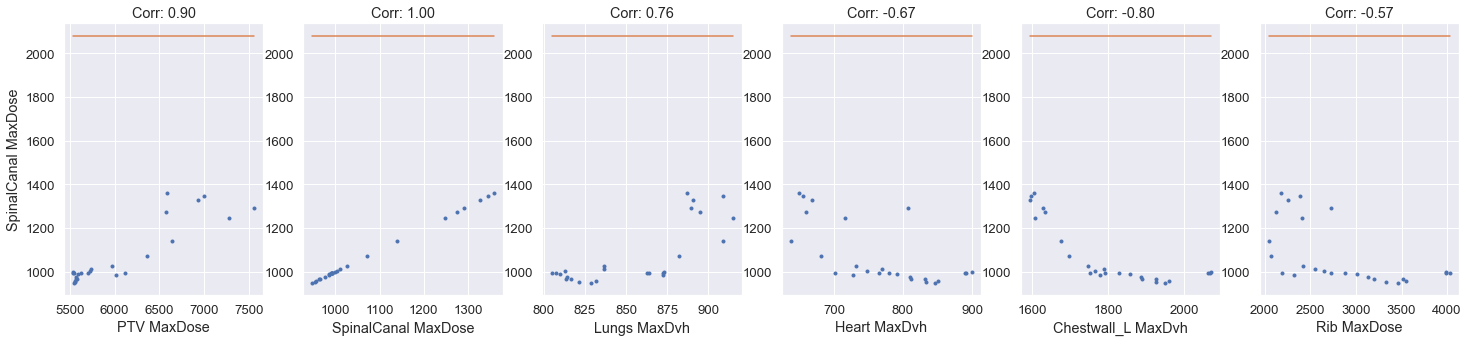

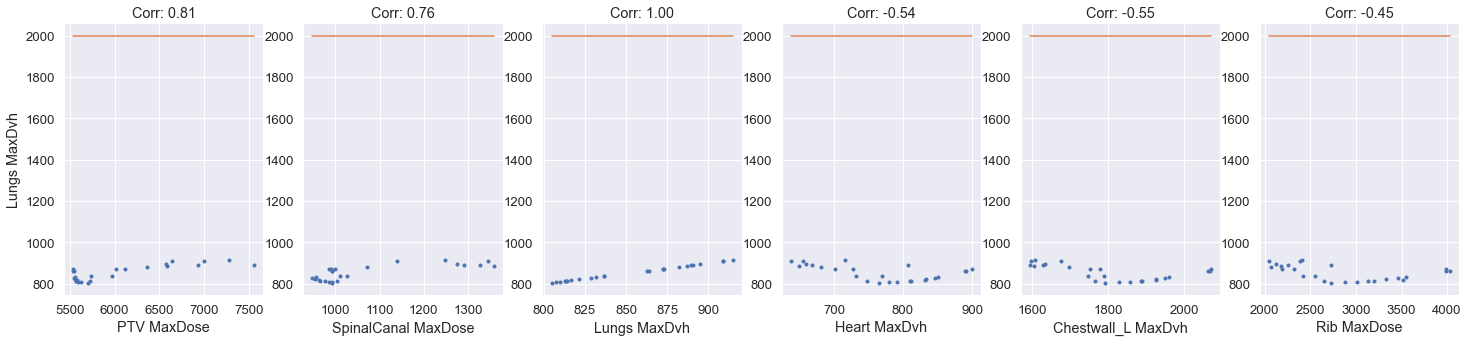

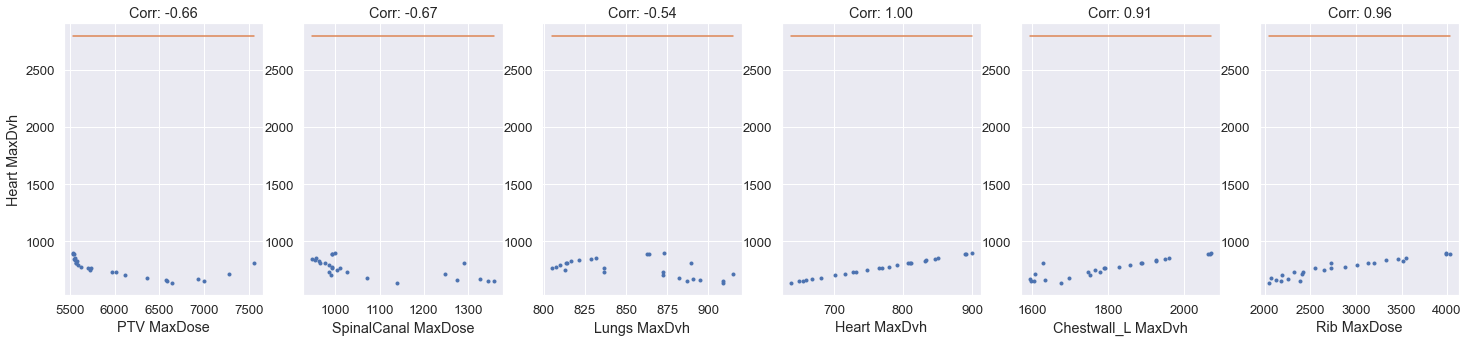

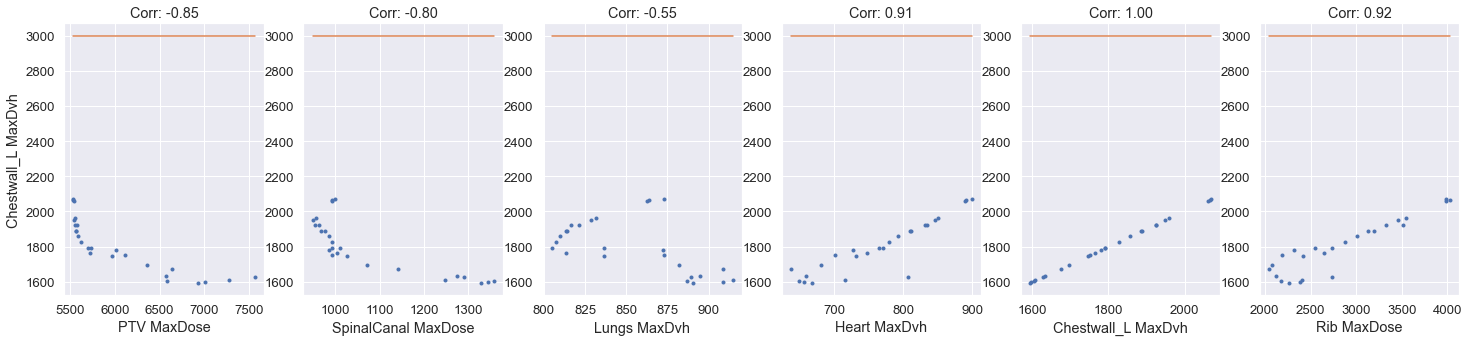

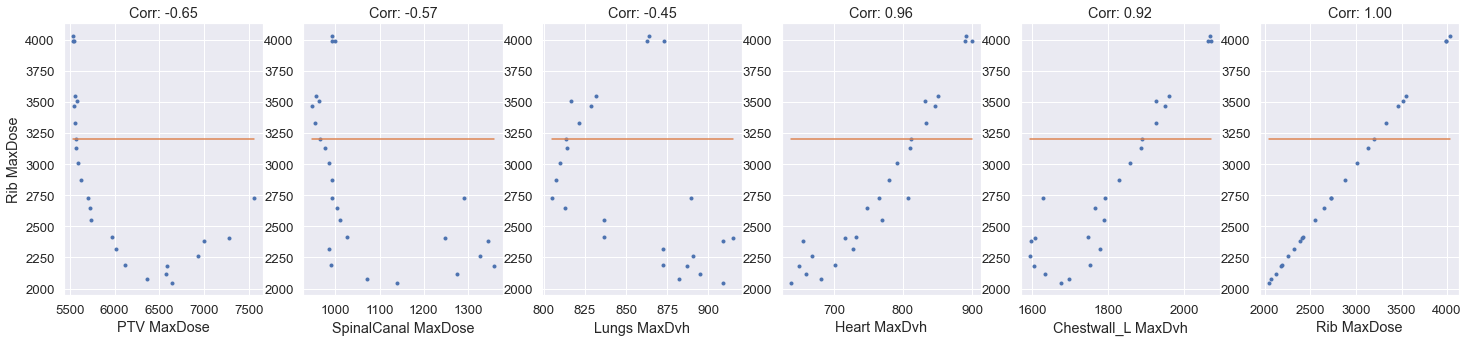

In [19]:
# Goal scatterplots
plots.scatterplot(goals[1:], results)

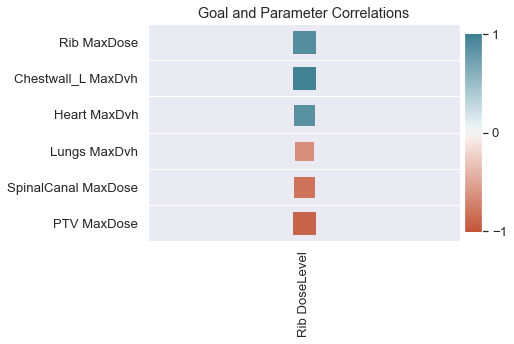

In [20]:
# Goal and parameters correlation
plots.corrplot(goals[1:], results, funcs, pars, 'Goal and Parameter Correlations')

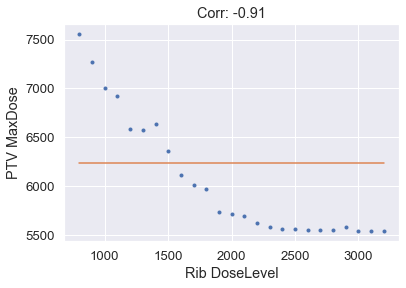

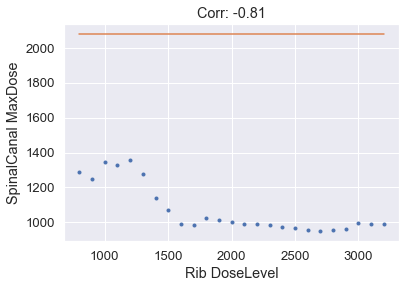

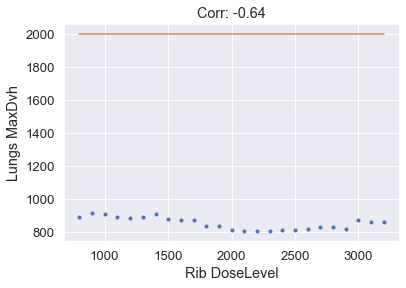

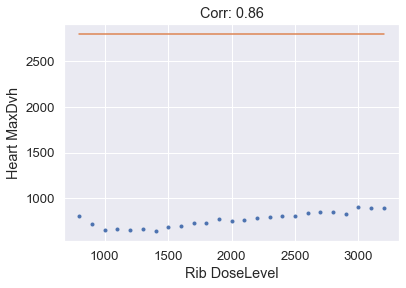

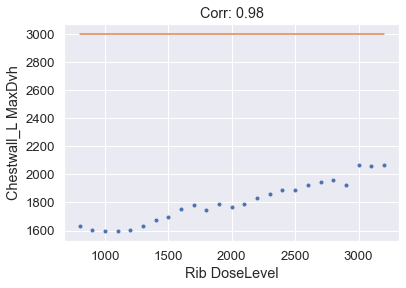

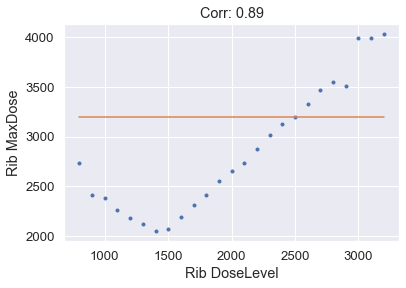

In [36]:
# Goal and parameter scatterplots
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    plt.figure()
    plt.plot(xdata[0], ydata[ii], '.')
    plt.plot([min(xdata[0]), max(xdata[0])], [level, level])
    plt.xlabel(xlabels[0])
    plt.ylabel(ylabels[ii])
    corr = f'Corr: {np.corrcoef(xdata[0], ydata[ii])[0, 1]:.2f}'
    plt.title(corr)

Text(0, 0.5, 'Penalty')

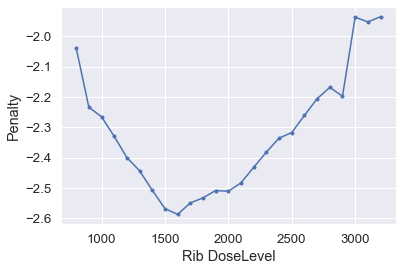

In [54]:
# Sum of linear penalties
penalty = 0
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.-')
plt.xlabel(xlabels[0])
plt.ylabel('Penalty')

In [64]:
# Load random search results
pars_rand = pd.read_pickle('pars_rand.npy')
results_rand = pd.read_pickle('results_rand.npy')

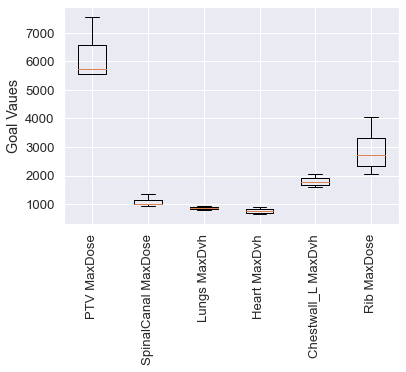

In [65]:
# Clinical goal results
plots.boxplot(goals[1:], results, 'goals')

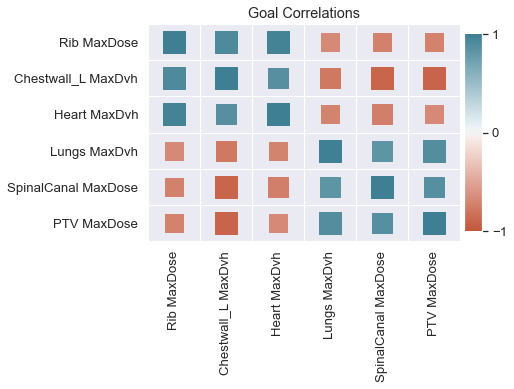

In [68]:
# Goal correlations
plots.corrplot(goals[1:], results_rand, title='Goal Correlations')

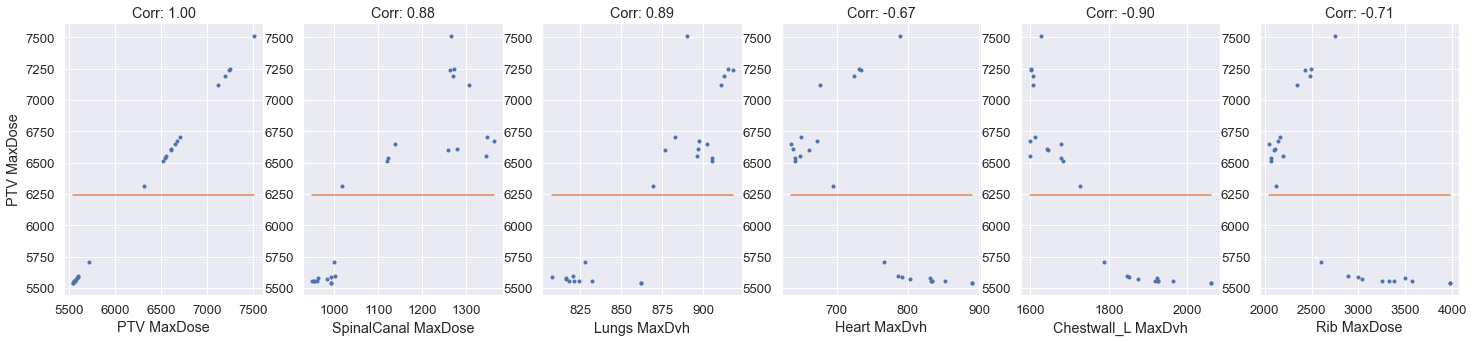

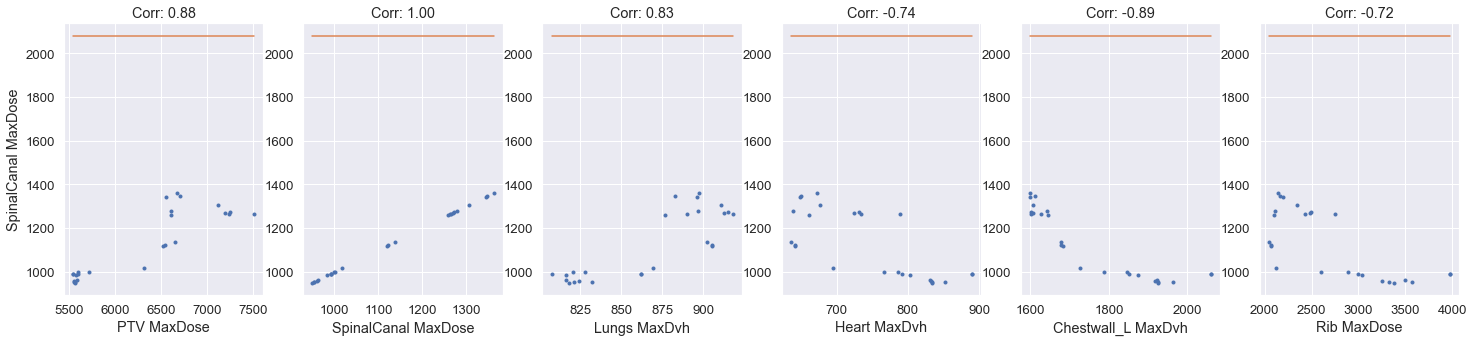

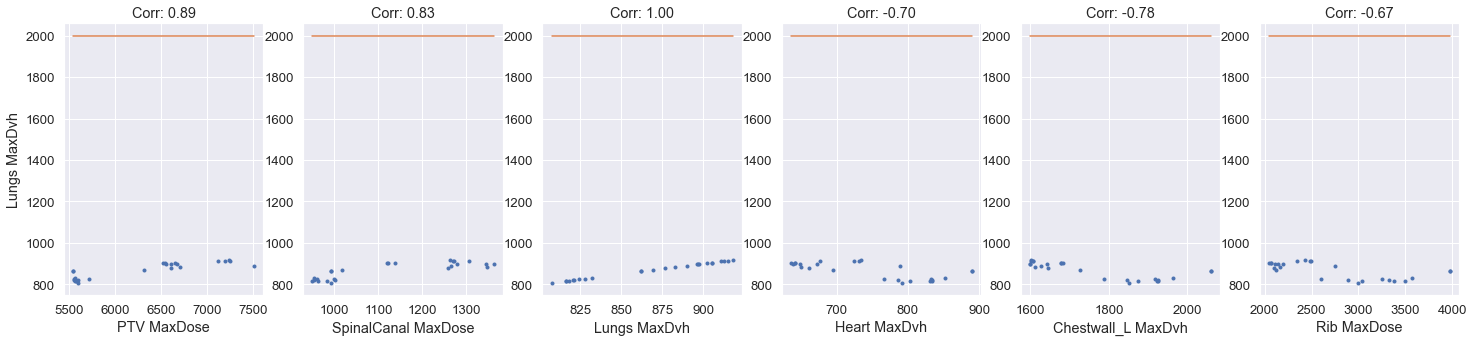

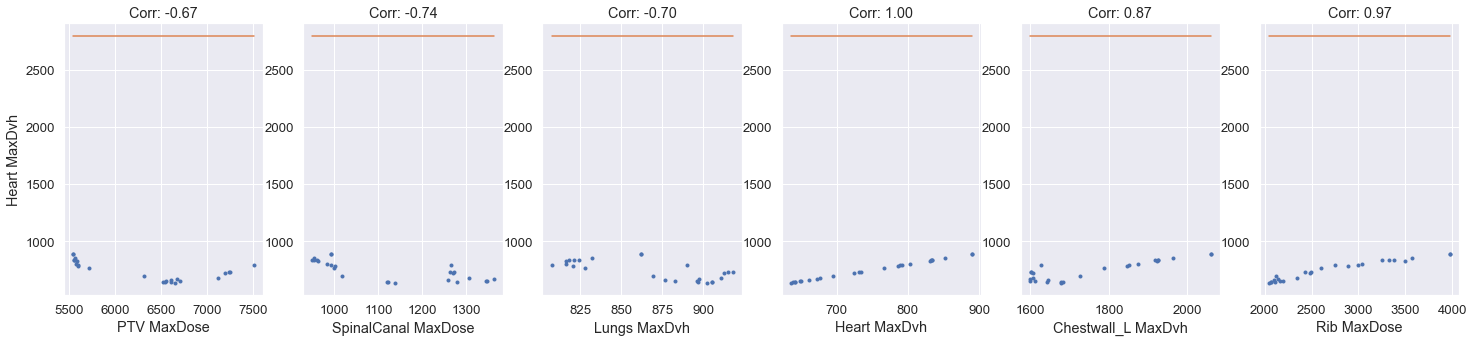

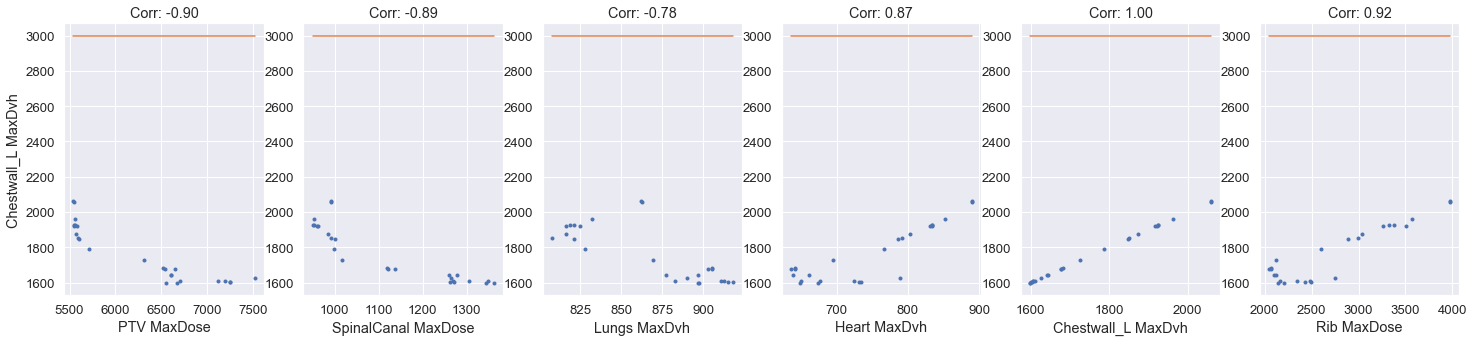

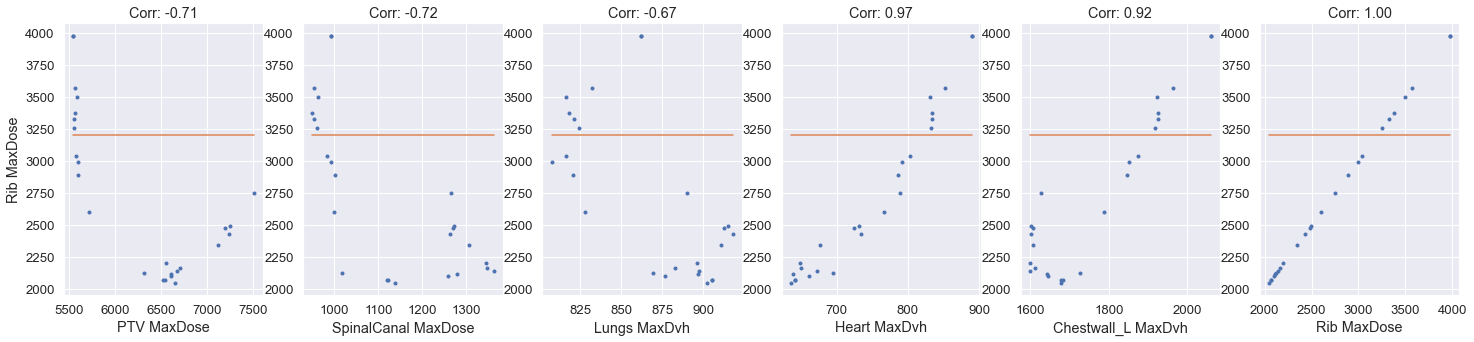

In [69]:
# Goal scatterplots
plots.scatterplot(goals[1:], results_rand)

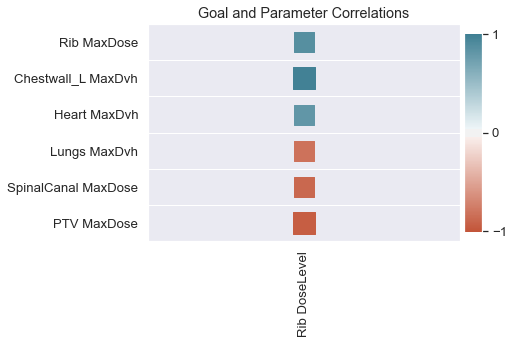

In [70]:
# Goal and parameters correlation
plots.corrplot(goals[1:], results_rand, funcs, pars_rand, 'Goal and Parameter Correlations')

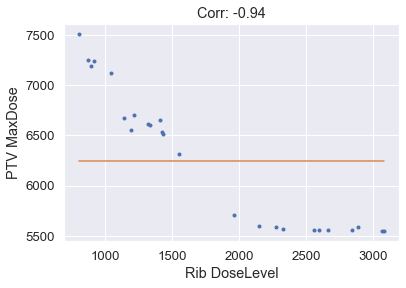

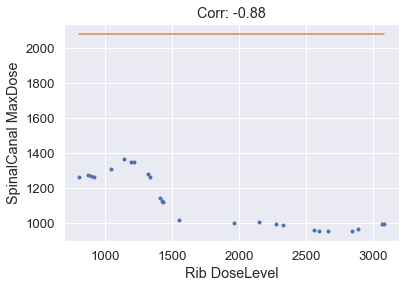

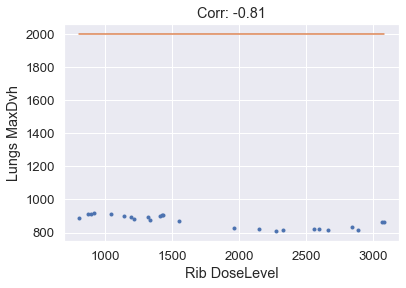

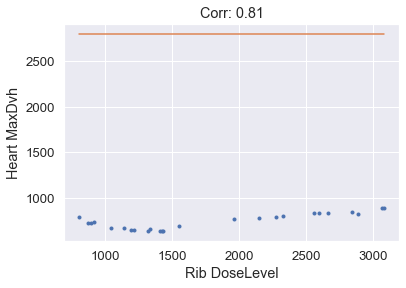

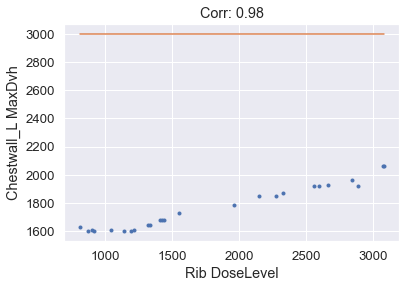

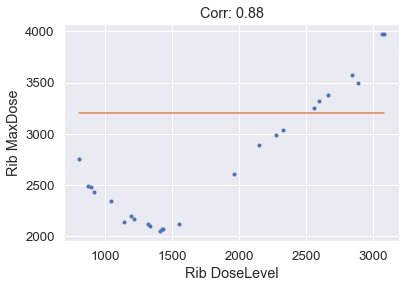

In [72]:
# Goal and parameter scatterplots
xdata, xlabels = plots.format_data(funcs, pars_rand, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results_rand, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    plt.figure()
    plt.plot(xdata[0], ydata[ii], '.')
    plt.plot([min(xdata[0]), max(xdata[0])], [level, level])
    plt.xlabel(xlabels[0])
    plt.ylabel(ylabels[ii])
    corr = f'Corr: {np.corrcoef(xdata[0], ydata[ii])[0, 1]:.2f}'
    plt.title(corr)

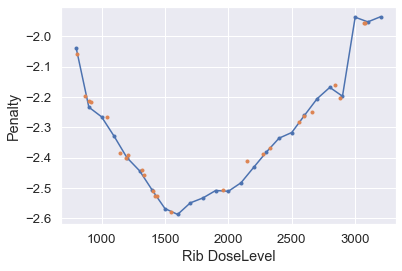

In [75]:
# Sum of linear penalties
penalty = 0
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.-')
plt.xlabel(xlabels[0])
plt.ylabel('Penalty')

penalty = 0
xdata, xlabels = plots.format_data(funcs, pars_rand, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results_rand, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.')

In [87]:
idx = np.argmin(penalty)
print(xdata[0].iloc[idx], penalty[idx])


1600.0 -2.5875008776035977


In [113]:
# Bayesian Optimization with Gaussian Process
x = np.load('x_gp.npy')
fun = np.load('fun_gp.npy')
x_iters = np.load('x_iters_gp.npy')
x_iters = [temp[0] for temp in x_iters]
func_vals = np.load('func_vals_gp.npy')

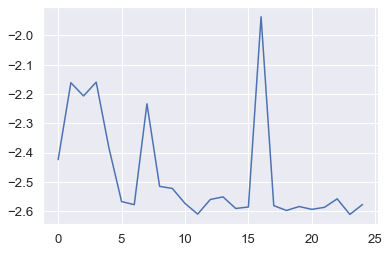

In [114]:
plt.plot(func_vals)

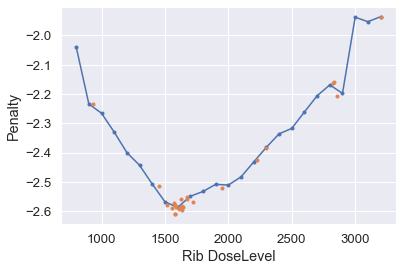

In [102]:
# Sum of linear penalties
penalty = 0
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.-')
plt.xlabel(xlabels[0])
plt.ylabel('Penalty')

plt.plot(x_iters, func_vals, '.')

In [106]:
# Bayesian Optimization with Gaussian Process
x = np.load('x_forest.npy')
fun = np.load('fun_forest.npy')
x_iters = np.load('x_iters_forest.npy')
x_iters = [temp[0] for temp in x_iters]
func_vals = np.load('func_vals_forest.npy')

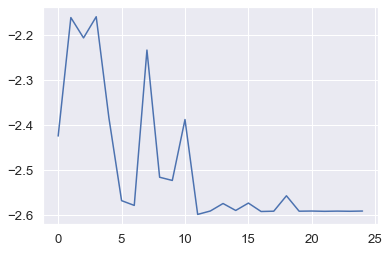

In [112]:
plt.plot(func_vals)

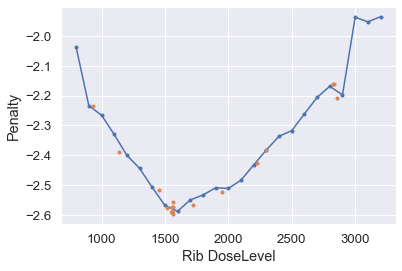

In [107]:
# Sum of linear penalties
penalty = 0
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.-')
plt.xlabel(xlabels[0])
plt.ylabel('Penalty')

plt.plot(x_iters, func_vals, '.')

In [115]:
# Random Sampling
x = np.load('x_rand.npy')
fun = np.load('fun_rand.npy')
x_iters = np.load('x_iters_rand.npy')
x_iters = [temp[0] for temp in x_iters]
func_vals = np.load('func_vals_rand.npy')

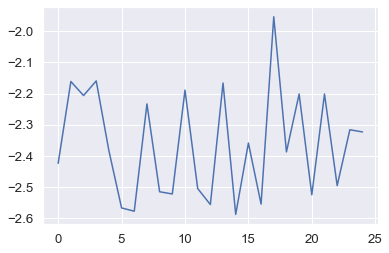

In [116]:
plt.plot(func_vals)

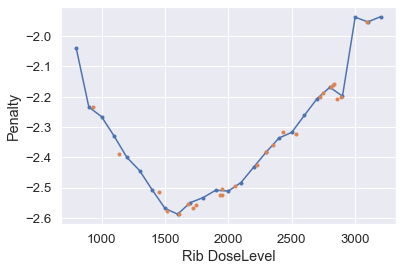

In [117]:
# Sum of linear penalties
penalty = 0
xdata, xlabels = plots.format_data(funcs, pars, 'pars')
ydata, ylabels = plots.format_data(goals[1:], results, 'goals')
for ii in range(len(ydata)):
    level = goals.iloc[ii+1]['AcceptanceLevel']
    penalty += (ydata[ii] - level)/level
plt.plot(xdata[0], penalty, '.-')
plt.xlabel(xlabels[0])
plt.ylabel('Penalty')

plt.plot(x_iters, func_vals, '.')